### Exploratory Data Analysis

### Data Pre-Processing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [2]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [4]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [5]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [7]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [8]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [9]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [10]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [11]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.

Filling player_dismissed null values with 'No wicket', didmissal_Kind null values with also No Wicket

In [12]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [13]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.

In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.

And in remaining columns max value is in certain limit only. So i can say there are not much outliers.

### Q1) who will win today match KXIP VS SRH?

In [78]:
#First Lets see head-head results
df_SRH_KXIP = df_matches[((df_matches['team1'] == 'Kings XI Punjab') | (df_matches['team1'] == 'Sunrisers Hyderabad')) & 
                        ((df_matches['team2'] == 'Kings XI Punjab') | (df_matches['team2'] == 'Sunrisers Hyderabad'))] 

#plotting SRH and KXIP wins against each other
import plotly.graph_objs as go
df_winner = df_SRH_KXIP[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by KXIP and SRH against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

SRH won more matches than KXIP in head-head matches. But IPL team will change every two years, So lets look at individual player performance in IPL as well.

In [88]:
#Lets look at how many player of the match awards won by current DC and KXIP players.
#Note: I am taking top 8 palyers from both teams
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_SRH = df_matches[(df_matches['player_of_match'] == 'DA Warner') | (df_matches['player_of_match'] == 'J Bairstow') |
                                (df_matches['player_of_match'] == 'MK Pandey') | (df_matches['player_of_match'] == 'Rashid Khan') |
                                (df_matches['player_of_match'] == 'S Sharma') | (df_matches['player_of_match'] == 'K Ahmed') |
                                (df_matches['player_of_match'] == 'JO Holder') | (df_matches['player_of_match'] == 'V Shankar')]

print("Total number of man of matches won by SRH players is", df_man_of_match_SRH.shape[0],"\n")

df_man_of_match_KXIP = df_matches[(df_matches['player_of_match'] == 'KL Rahul') | (df_matches['player_of_match'] == 'MA Agarwal') |
                                (df_matches['player_of_match'] == 'GJ Maxwell') | (df_matches['player_of_match'] == 'CH Gayle') |
                                (df_matches['player_of_match'] == 'Mohammed Shami') | (df_matches['player_of_match'] == 'Mandeep Singh') |
                                (df_matches['player_of_match'] == 'CJ Jordan') | (df_matches['player_of_match'] == 'M Ashwin') ]

print("Total number of man of matches won by Punjab players is", df_man_of_match_KXIP.shape[0])  

Total number of man of matches won by SRH players is 31 

Total number of man of matches won by Punjab players is 36


**Conclusion :-**

KXIP players won more man of the match awrads than SRH players. So i can say KXIP has more match winners then SRH. So i am predicting KXIP will win today match.

### Q2) Which of the following will be true about Warner i.e what is his strike rate and weather he will get out or not?

In [89]:
#Lets calculate warner strike rate against current KXIP bowlers. 
df_Warner_against_DC = df_deliveries[(df_deliveries['batsman'] == 'DA Warner') &
                         ((df_deliveries['bowler'] == 'Mohammed Shami') | (df_deliveries['bowler'] == 'M Ashwin') |
                         (df_deliveries['bowler'] == 'CJ Jordan')  | (df_deliveries['bowler'] == 'GJ Maxwell'))]                                           

#Number of runs scored by Warner against current KXIP bowlers
total_runs = df_Warner_against_DC['batsman_runs'].sum()
#Number of balls faced by warner against current KXIP bowlers
#Here wide balls are not counted under batsman faced balls. We can count No-balls under batsman faced deliveries
no_of_balls = len(df_Warner_against_DC['ball']) - len(df_Warner_against_DC[df_Warner_against_DC['wide_runs'] >= 1])

print("David Warner Scored",total_runs, "runs aginst current KXIP bowlers in",no_of_balls,"balls\n")

Strike_rate = (total_runs/no_of_balls)*100
print("David Warner Strike rate against current KXIP bowlers is",int(Strike_rate))

David Warner Scored 100 runs aginst current KXIP bowlers in 73 balls

David Warner Strike rate against current KXIP bowlers is 136


In [90]:
#Lets calcualte David Warner overall strike rate in IPL
df_Warner = df_deliveries[(df_deliveries['batsman'] == "DA Warner") ]

#Number of runs scored by Warner in first 6 overs
total_runs = df_Warner['batsman_runs'].sum()
#Number of balls faced by warner in first 6 overs
#Here wide balls are not counted under batsman faced balls. We can count No-balls under batsman faced deliveries
no_of_balls = len(df_Warner['ball']) - len(df_Warner[df_Warner['wide_runs'] >= 1])

print("David Warner Scored",total_runs, "runs in IPL in",no_of_balls,"balls\n")

Strike_rate = (total_runs/no_of_balls)*100
print("David Warner Strike rate in IPL is",int(Strike_rate))

David Warner Scored 4741 runs in IPL in 3306 balls

David Warner Strike rate in IPL is 143


In [92]:
#Calculating number of times david warner got out in IPL
#Some times batsman get out when he was in non-striker end. i.e why i filtering non-striker also.
df_Warner_wicket = df_deliveries[(df_deliveries['batsman'] == "DA Warner") | (df_deliveries['non_striker'] == "DA Warner")]

out = len(df_Warner_wicket[df_Warner_wicket['player_dismissed'] == "DA Warner"])
no_of_matches = df_Warner_wicket['match_id'].nunique()

print(out,"times Warner got out in",no_of_matches,"matches")

110 times Warner got out in 126 matches


**Conclusion :-**

According to above analysis warner strike rate in today match will be more than 125 and he is top order batsman and also he got out in IPL almost every match. So i am predicting he is out and strike rate is above 125.

### Q3) What would be KL Rahul Contribution to the team total?

In [74]:
#Lets filter out KL rahul rows when he played for punjab
#I know KL rahul is playing for KXIP from 2018 onwards
#Lets claculate the number of runs scored by KXIP and KL rahul
#In some matches player will goes for Diamond duck(with out facing deliveries) i.e 0(0). i.why i am choosing non-striker option also
df_rahul = df_deliveries[(df_deliveries["batsman"] == 'KL Rahul') & (df_deliveries["batting_team"] == 'Kings XI Punjab')]  
common = df_deliveries.merge(df_rahul,on=['match_id','match_id'])

df_KXIP = df_deliveries[(df_deliveries.match_id.isin(common.match_id))&(df_deliveries.match_id.isin(common.match_id))]
df_KXIP = df_KXIP[df_KXIP['batting_team'] == 'Kings XI Punjab']    

rahul_runs = df_rahul['batsman_runs'].sum()
KXIP_runs = df_KXIP['total_runs'].sum()
print("Total runs scored by KL rahul for KXIP is",rahul_runs,"runs\n")
print("Total Runs scored by KXIP when Rahul was in KXIP playing11 is",KXIP_runs,"runs")

Total runs scored by KL rahul for KXIP is 1288 runs

Total Runs scored by KXIP when Rahul was in KXIP playing11 is 4825 runs


In [76]:
#Lets calculate percentage of runs he scored
Per_runs = (rahul_runs*100)/(KXIP_runs)
print(round(Per_runs,2),"% was the total contribution by KL Rahul to KXIP total score when he was in playing11" )

26.69 % was the total contribution by KL Rahul to KXIP total score when he was in playing11


**Conclusion :-**

According to above analysis i am predicting his contribution in today match is above 25%.

### Q4) How many balls would SRH take to reach 50 runs on team total? 

In [31]:
#Filtering out SRH team matches in IPL
df_SRH = df_deliveries[df_deliveries['batting_team'] == "Sunrisers Hyderabad"] 

#converting total runs,match id, wide balls into list
batsman_runs_list = df_SRH['total_runs'].tolist()
match_id_list = df_SRH['match_id'].tolist()
wides_list = df_SRH['wide_runs'].tolist() 
#I am taking this wide list because while calcualting total balls faced to reach 50,then i dont want to consider wide balls.
#I know no-balls also not consider under balls faced by team. But you will get hardly 0-1 no ball in innings. So i am not removing any no-balls.

listoflists = []
listoflists.append(match_id_list)
listoflists.append(batsman_runs_list)
listoflists.append(wides_list)

#Here i am writing for loop to get how many balls taken in each match to reach 50 runs by SRH.
SRH_ballsfaced = []
SRH_matchID = []
sum = 0
balls_faced = 0
for i in range(len(listoflists[0])-1):
     sum = sum + (listoflists[1][i])
     if listoflists[2][i] < 1:
       balls_faced = balls_faced + 1
     if listoflists[0][i] != listoflists[0][i+1]:
       sum = 0
       balls_faced = 0
     if listoflists[0][i] not in SRH_matchID:   
        if sum >= 50:
           SRH_ballsfaced.append(balls_faced)
           SRH_matchID.append(listoflists[0][i])
           sum = 0
           balls_faced = 0

print("Balls Faced to reach 50 runs:",SRH_ballsfaced)
print("Corresponding Match_id      :",SRH_matchID)   

Balls Faced to reach 50 runs: [33, 33, 43, 51, 54, 43, 40, 29, 23, 31, 43, 39, 39, 56, 48, 51, 56, 43, 67, 51, 43, 50, 46, 51, 46, 37, 44, 35, 66, 44, 64, 48, 45, 34, 46, 44, 40, 36, 43, 34, 41, 32, 33, 37, 37, 26, 52, 36, 42, 31, 31, 26, 41, 31, 45, 26, 30, 54, 33, 57, 50, 26, 27, 74, 38, 51, 35, 53, 34, 35, 42, 39, 45, 43, 32, 31, 35, 30, 40, 47, 26, 46, 44, 34, 48, 33, 46, 33, 27, 39, 38, 40, 34, 28, 29, 28, 49, 52, 43, 26, 27, 32, 35, 19, 28, 30, 34]
Corresponding Match_id      : [1, 6, 10, 14, 19, 21, 25, 32, 36, 39, 43, 47, 52, 57, 384, 388, 394, 397, 402, 405, 414, 416, 423, 428, 432, 435, 440, 444, 449, 453, 455, 461, 466, 469, 474, 477, 481, 487, 493, 496, 500, 503, 507, 511, 521, 525, 529, 531, 537, 541, 544, 551, 555, 558, 561, 564, 568, 572, 580, 584, 588, 591, 594, 598, 603, 610, 613, 616, 618, 622, 628, 631, 634, 635, 636, 7897, 7900, 7903, 7909, 7913, 7916, 7918, 7921, 7929, 7932, 7935, 7939, 7944, 7947, 7950, 7952, 7953, 11138, 11144, 11147, 11152, 11310, 11313, 11321, 

In [37]:
#converting above two ists into dataframe
df_SRH_ballsfaced_50runs =  pd.DataFrame(list(zip(SRH_matchID, SRH_ballsfaced)), columns =['match_id', 'balls_faced']) 

#Lets see central tendency and percentile values
df_SRH_ballsfaced_50runs['balls_faced'].describe()


count    107.000000
mean      39.859813
std       10.188274
min       19.000000
25%       32.500000
50%       39.000000
75%       46.000000
max       74.000000
Name: balls_faced, dtype: float64

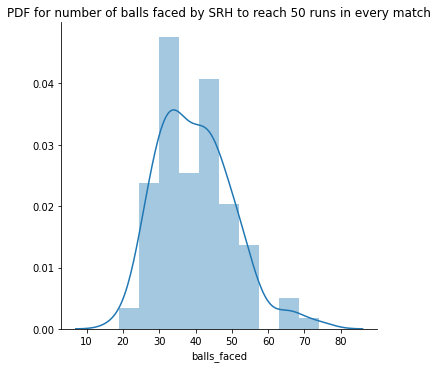

In [39]:
#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_SRH_ballsfaced_50runs,size=5) \
   .map(sns.distplot, "balls_faced") \
   .add_legend();

plt.title("PDF for number of balls faced by SRH to reach 50 runs in every match")
plt.show();

**Conclusion :-**


1.   By looking at above PDF plot i can say balls = 30 to 35 has highest probability to score 50 runs.
2.   Mean = 39 and 50% values are less than 39.

So i am predicting SRH will Score 50 runs in 30-36 balls according to above analysis.



### Q5) How many runs will chris gayle score in the first 10 balls he faces? If he gets out before 10 balls, then the number of runs he scored until he gets out will be considered?

In [54]:
#Filtering out gale from batsman column against all teams and not taking wide deliveries
#because batsman wont score in wide deliveries but he can score in no-balls
df_Gayle = df_deliveries[(df_deliveries['batsman'] == 'CH Gayle') & (df_deliveries['wide_runs'] == 0)]

#converting batsman runs and match_id to list
runs_list = df_Gayle['batsman_runs'].to_list()
matchid_list = df_Gayle['match_id'].to_list()

listoflists = []
listoflists.append(matchid_list)
listoflists.append(runs_list)

Gayle_runs_scored = []
Gayle_matchID = []
balls_faced = 0
runs = 0

for i in range(len(listoflists[0])-1):
  balls_faced = balls_faced + 1
  if listoflists[0][i] != listoflists[0][i+1] and balls_faced < 10 and listoflists[0][i] not in Gayle_matchID:
     Gayle_runs_scored.append(runs)
     Gayle_matchID.append(listoflists[0][i])
     balls_faced = 0
     runs = 0 
  if  balls_faced <= 10 :
     runs = runs + (listoflists[1][i])
     if balls_faced == 10 or listoflists[0][i] != listoflists[0][i+1]:
        if listoflists[0][i] not in Gayle_matchID:   
           Gayle_runs_scored.append(runs)
           Gayle_matchID.append(listoflists[0][i])
           runs = 0
           balls_faced = 0
  if listoflists[0][i] != listoflists[0][i+1]: #if match_id changes then i am taking balls_faced=0 and runs=0 
     balls_faced = 0
     runs = 0 

#Printing number of runs scored by Gayle in each match for 1st 10 balls he faced.
print("Runs scored by Gayle for 1st 10balls:",Gayle_runs_scored,"\n")
print("Corresponding Match_id              :", Gayle_matchID)

Runs scored by Gayle for 1st 10balls: [21, 6, 7, 16, 2, 8, 0, 0, 15, 4, 10, 6, 12, 14, 7, 3, 5, 14, 20, 4, 15, 20, 16, 7, 0, 13, 21, 14, 5, 28, 13, 34, 0, 20, 8, 28, 0, 2, 10, 8, 8, 10, 4, 14, 14, 4, 2, 10, 6, 5, 27, 4, 10, 11, 4, 14, 9, 21, 9, 23, 10, 4, 6, 4, 7, 13, 16, 20, 10, 24, 4, 6, 8, 5, 6, 6, 7, 13, 1, 9, 13, 10, 21, 21, 12, 14, 35, 1, 7, 10, 1, 0, 7, 5, 2, 9, 6, 1, 9, 11, 10, 17, 13, 10, 6, 8, 1, 14, 6, 18, 0, 8, 10, 18, 5, 15, 15, 6, 13, 24, 23, 4, 13, 6] 

Corresponding Match_id              : [1, 5, 12, 20, 27, 30, 42, 45, 55, 121, 123, 126, 132, 134, 138, 142, 191, 196, 200, 204, 208, 213, 217, 222, 227, 258, 263, 268, 280, 283, 288, 291, 296, 302, 304, 306, 307, 317, 320, 326, 329, 333, 338, 344, 350, 356, 360, 362, 367, 372, 376, 383, 388, 392, 396, 401, 407, 411, 417, 420, 426, 429, 432, 438, 441, 448, 452, 475, 481, 484, 488, 492, 495, 499, 503, 506, 522, 525, 534, 540, 543, 546, 550, 557, 562, 566, 568, 571, 574, 575, 580, 587, 606, 617, 620, 624, 626, 632, 633, 636,

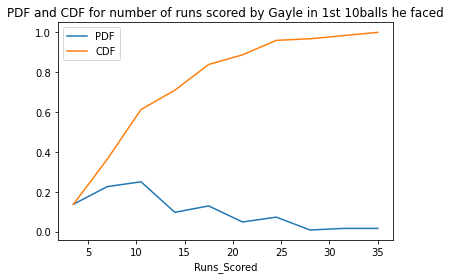

In [67]:
#Converting above two lists into dataframe
df_Gayle_runs_scored=  pd.DataFrame(list(zip(Gayle_matchID, Gayle_runs_scored)), columns =['match_id', 'Runs_Scored_1st_10balls']) 


#Cumulative sum of area under curve upto gives you cdf
import numpy as np
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_Gayle_runs_scored['Runs_Scored_1st_10balls'], bins=10,density = True)
pdf = counts/(np.sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(leg)
plt.xlabel('Runs_Scored')
plt.title("PDF and CDF for number of runs scored by Gayle in 1st 10balls he faced")
plt.show();

**Conclusion :-**


1.   By looking at above CDF plot i can say 90% of the values are less than 25. So almost in every matche he score less than 25 runs for 1st 10 balls.

According to CDF i am predicting his score will be between 15-25. In given option i am choosing 18-24.

